**Table of contents**<a id='toc0_'></a>    
- [Network X Playground](#toc1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Network X Playground](#toc0_)

edges_df

In [436]:
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import numpy as np


In [407]:
def combine_columns(df, columns_to_combine, columns_to_keep, new_name, columns_to_drop):
    """Combine multiple columns into one while keeping associated data attached.
    Use this function when the columns to combine are easier to list 
    than the columns not to combine.
    
    :param df: The DataFrame containing the columns to be combined
    :param columns_to_combine: List of column names to combine into one
    :param columns_to_keep: List of columns to keep in the final DataFrame
    :param new_name: The name of the new combined column
    :param columns_to_drop: List of columns to drop from the final DataFrame
    :return: A new DataFrame with combined columns and selected columns retained
    """
    og_df = df.copy()

    combined_dfs = []

    # Loop through each column in columns_to_combine and create a new DataFrame
    for col in columns_to_combine:
        temp_df = og_df[list(set([col] + columns_to_keep))].copy()
        temp_df[new_name] = temp_df[col]
        combined_dfs.append(temp_df)

    df_combined = pd.concat(combined_dfs, ignore_index=True)
    df_combined.drop(columns_to_drop, axis=1, inplace=True)
    df_combined.drop_duplicates(inplace=True)
    
    return df_combined

In [408]:
edges_df = pd.read_csv("../output/edges_df.csv", index_col=[0])
edges_df

,symbol,gene_symbol,concept_id,relationship,source
0,MT-TF,MT-TF,HGNC:7481,NaN,NaN
1,MT-RNR1,MT-RNR1,HGNC:7470,NaN,NaN
2,MT-TV,MT-TV,HGNC:7500,NaN,NaN
3,MT-RNR2,MT-RNR2,HGNC:7471,NaN,NaN
4,MT-TL1,MT-TL1,HGNC:7490,NaN,NaN
...,...,...,...,...,...
1049642,NIID,NOTCH2NLC,GENE ID:100996717,Prefix Disease Symbol,OMIM
1049647,OPDM3,NOTCH2NLC,GENE ID:100996717,Prefix Disease Symbol,OMIM
1049684,OPML1,NUTM2B-AS1,GENE ID:101060691,Prefix Disease Symbol,OMIM
1049790,CFZS2,MYMX,GENE ID:101929726,Prefix Disease Symbol,OMIM


In [409]:
asp_edges_df = edges_df.loc[(edges_df["symbol"] == "ASP") | (edges_df["gene_symbol"].isin(["ATG5", "ASIP", "A1CF", "ASPA", "ASPM", "TMPRSS11D", "ROPN1L","C3"]))]
asp_edges_df

,symbol,gene_symbol,concept_id,relationship,source
7229,ATG5,ATG5,HGNC:589,NaN,NaN
15937,ASIP,ASIP,HGNC:745,NaN,NaN
22884,ASPA,ASPA,HGNC:756,NaN,NaN
25606,A1CF,A1CF,HGNC:24086,NaN,NaN
27495,ASPM,ASPM,HGNC:19048,NaN,NaN
...,...,...,...,...,...
868443,MCPH5,ASPM,GENE ID:259266,Prefix Disease Symbol,OMIM
868771,ARMD9,C3,GENE ID:718,Prefix Disease Symbol,OMIM
1014607,SHEP9,ASIP,GENE ID:434,Prefix Disease Symbol,OMIM
1015011,AHUS5,C3,GENE ID:718,Prefix Disease Symbol,OMIM


In [410]:
asp_G = nx.from_pandas_edgelist(asp_edges_df, "gene_symbol", "symbol")

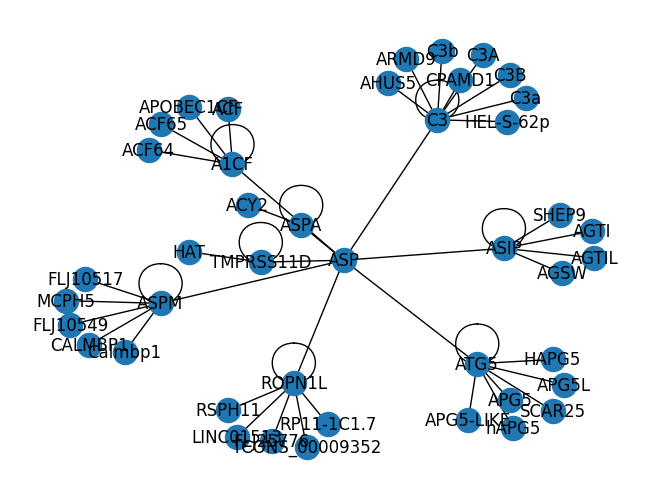

In [411]:
nx.draw_spring(asp_G, with_labels=True)
plt.show()

Combine identifier_concordance dfs

In [412]:
ensg_combined_symbols_df = pd.read_csv("../output/ensg_combined_symbols_df.csv", index_col=[0])
ensg_combined_symbols_df

,HGNC_ID,ENSG_ID,NCBI_ID,gene_symbol,symbol
0,HGNC:7481,ENSG00000210049,NaN,MT-TF,MT-TF
2,HGNC:7470,ENSG00000211459,NaN,MT-RNR1,MT-RNR1
5,HGNC:7500,ENSG00000210077,NaN,MT-TV,MT-TV
7,HGNC:7471,ENSG00000210082,NaN,MT-RNR2,MT-RNR2
10,HGNC:7490,ENSG00000209082,NaN,MT-TL1,MT-TL1
...,...,...,...,...,...
190043,HGNC:30062,ENSG00000197989,GENE ID:85028,SNHG12,LINC00100
190044,HGNC:30062,ENSG00000197989,GENE ID:85028,SNHG12,PNAS-123
190045,HGNC:52502,ENSG00000229388,NaN,TAF12-DT,LINC01715
190046,HGNC:10108,ENSG00000274978,GENE ID:26824,RNU11,RNU11-1


In [413]:
identifier_concordance_ensg_df = combine_columns(ensg_combined_symbols_df, ["HGNC_ID", "NCBI_ID"], ['gene_symbol', "ENSG_ID"], "xref", ["HGNC_ID", "NCBI_ID"])
identifier_concordance_ensg_df.head()

,ENSG_ID,gene_symbol,xref
0,ENSG00000210049,MT-TF,HGNC:7481
1,ENSG00000211459,MT-RNR1,HGNC:7470
2,ENSG00000210077,MT-TV,HGNC:7500
3,ENSG00000210082,MT-RNR2,HGNC:7471
4,ENSG00000209082,MT-TL1,HGNC:7490


In [414]:
identifier_concordance_ensg_df = identifier_concordance_ensg_df.rename(columns={'ENSG_ID': 'primary_ID'})

In [415]:
hgnc_combined_symbols_df = pd.read_csv("../output/hgnc_combined_symbols_df.csv", index_col=[0])
hgnc_combined_symbols_df

,HGNC_ID,ENSG_ID,NCBI_ID,gene_symbol,symbol
0,HGNC:100,ENSG00000110881,GENE ID:41,ASIC1,ASIC1
2,HGNC:10000,ENSG00000117152,GENE ID:5999,RGS4,RGS4
3,HGNC:10001,ENSG00000143248,GENE ID:8490,RGS5,RGS5
4,HGNC:10002,ENSG00000182732,GENE ID:9628,RGS6,RGS6
5,HGNC:10003,ENSG00000182901,GENE ID:6000,RGS7,RGS7
...,...,...,...,...,...
132409,HGNC:9997,ENSG00000143333,GENE ID:6004,RGS16,RGS-r
132410,HGNC:9998,ENSG00000116741,GENE ID:5997,RGS2,NaN
132411,HGNC:9999,ENSG00000138835,GENE ID:5998,RGS3,C2PA
132412,HGNC:9999,ENSG00000138835,GENE ID:5998,RGS3,FLJ20370


In [416]:
hgnc_combined_symbols_df[hgnc_combined_symbols_df['gene_symbol'].isnull()]

,HGNC_ID,ENSG_ID,NCBI_ID,gene_symbol,symbol


How many corfs are in HGNC 

In [417]:
corf_recog_pattern = r'^C.*ORF'


corfs_in_hgnc_df = hgnc_combined_symbols_df.loc[hgnc_combined_symbols_df['gene_symbol'].str.contains(corf_recog_pattern, regex=True, case=False)&
    ~hgnc_combined_symbols_df['gene_symbol'].str.contains('-', na=False)]
set_primary_corf_symbols_in_hgnc = set(corfs_in_hgnc_df["gene_symbol"])
len(set_primary_corf_symbols_in_hgnc)

246

In [418]:
identifier_concordance_hgnc_df = combine_columns(hgnc_combined_symbols_df, ["NCBI_ID", "ENSG_ID"], ['gene_symbol', "HGNC_ID"], "xref", ["NCBI_ID", "ENSG_ID"])
identifier_concordance_hgnc_df.head()

,HGNC_ID,gene_symbol,xref
0,HGNC:100,ASIC1,GENE ID:41
1,HGNC:10000,RGS4,GENE ID:5999
2,HGNC:10001,RGS5,GENE ID:8490
3,HGNC:10002,RGS6,GENE ID:9628
4,HGNC:10003,RGS7,GENE ID:6000


In [419]:
identifier_concordance_hgnc_df

,HGNC_ID,gene_symbol,xref
0,HGNC:100,ASIC1,GENE ID:41
1,HGNC:10000,RGS4,GENE ID:5999
2,HGNC:10001,RGS5,GENE ID:8490
3,HGNC:10002,RGS6,GENE ID:9628
4,HGNC:10003,RGS7,GENE ID:6000
...,...,...,...
154665,HGNC:9995,RGS13,ENSG00000127074
154666,HGNC:9996,RGS14,ENSG00000169220
154667,HGNC:9997,RGS16,ENSG00000143333
154668,HGNC:9998,RGS2,ENSG00000116741


In [420]:
identifier_concordance_hgnc_df = identifier_concordance_hgnc_df.rename(columns={'HGNC_ID': 'primary_ID'})

In [421]:
ncbi_combined_symbols_df = pd.read_csv("../output/ncbi_combined_symbols_df.csv", index_col=[0])
ncbi_combined_symbols_df

,HGNC_ID,ENSG_ID,NCBI_ID,gene_symbol,symbol
0,HGNC:5,ENSG00000121410,GENE ID:1,A1BG,A1BG
4,HGNC:7,ENSG00000175899,GENE ID:2,A2M,A2M
8,HGNC:7645,ENSG00000171428,GENE ID:9,NAT1,NAT1
12,HGNC:7646,ENSG00000156006,GENE ID:10,NAT2,NAT2
15,HGNC:15,NaN,GENE ID:11,NATP,NATP
...,...,...,...,...,...
182749,HGNC:40064,NaN,GENE ID:141732005,ADCY2-AS1,NaN
182750,HGNC:41074,NaN,GENE ID:141732006,NSG2-AS1,NaN
182751,HGNC:58430,NaN,GENE ID:141732007,ST18-AS1,NaN
182752,HGNC:58437,NaN,GENE ID:141732008,MICAL2-AS1,NaN


In [422]:
identifier_concordance_ncbi_df = combine_columns(ncbi_combined_symbols_df, ["HGNC_ID", "ENSG_ID"], ['gene_symbol', "NCBI_ID"], "xref", ["HGNC_ID", "ENSG_ID"])
identifier_concordance_ncbi_df.head()

,NCBI_ID,gene_symbol,xref
0,GENE ID:1,A1BG,HGNC:5
1,GENE ID:2,A2M,HGNC:7
2,GENE ID:9,NAT1,HGNC:7645
3,GENE ID:10,NAT2,HGNC:7646
4,GENE ID:11,NATP,HGNC:15


In [423]:
identifier_concordance_ncbi_df

,NCBI_ID,gene_symbol,xref
0,GENE ID:1,A1BG,HGNC:5
1,GENE ID:2,A2M,HGNC:7
2,GENE ID:9,NAT1,HGNC:7645
3,GENE ID:10,NAT2,HGNC:7646
4,GENE ID:11,NATP,HGNC:15
...,...,...,...
180650,GENE ID:141732005,ADCY2-AS1,NaN
180651,GENE ID:141732006,NSG2-AS1,NaN
180652,GENE ID:141732007,ST18-AS1,NaN
180653,GENE ID:141732008,MICAL2-AS1,NaN


In [424]:
identifier_concordance_ncbi_df = identifier_concordance_ncbi_df.rename(columns={'NCBI_ID': 'primary_ID'})

In [425]:
identifier_concordance_df = pd.concat([identifier_concordance_ensg_df,identifier_concordance_hgnc_df,identifier_concordance_ncbi_df])
identifier_concordance_df


,primary_ID,gene_symbol,xref
0,ENSG00000210049,MT-TF,HGNC:7481
1,ENSG00000211459,MT-RNR1,HGNC:7470
2,ENSG00000210077,MT-TV,HGNC:7500
3,ENSG00000210082,MT-RNR2,HGNC:7471
4,ENSG00000209082,MT-TL1,HGNC:7490
...,...,...,...
180650,GENE ID:141732005,ADCY2-AS1,NaN
180651,GENE ID:141732006,NSG2-AS1,NaN
180652,GENE ID:141732007,ST18-AS1,NaN
180653,GENE ID:141732008,MICAL2-AS1,NaN


In [426]:
primary_concept_id_set = set(identifier_concordance_df['primary_ID'])
len(primary_concept_id_set)

137275

In [427]:
prefixes = ['HGNC', 'ENSG', 'GENE']

In [428]:
from collections import defaultdict

prefix_counts = defaultdict(int)

for item in primary_concept_id_set:
    for prefix in prefixes:
        if item.startswith(prefix):
            prefix_counts[prefix] += 1
            break  # stop after first match, if that's what you want

# Print results
for prefix in prefixes:
    print(f"{prefix}: {prefix_counts[prefix]}")

HGNC: 44235
ENSG: 48401
GENE: 44639


how many xrefs map to a record that is no longer active in the db?

In [437]:
xref_concept_id_ensg_set = set(identifier_concordance_ensg_df['xref'])
xref_concept_id_hgnc_set = set(identifier_concordance_hgnc_df['xref'])
xref_concept_id_ncbi_set = set(identifier_concordance_ncbi_df['xref'])

In [438]:
primary_concept_id_ensg_set = set(identifier_concordance_ensg_df['primary_ID'])
primary_concept_id_hgnc_set = set(identifier_concordance_hgnc_df['primary_ID'])
primary_concept_id_ncbi_set = set(identifier_concordance_ncbi_df['primary_ID'])

In [439]:
dead_end_xrefs_ensg_set = xref_concept_id_ensg_set - primary_concept_id_hgnc_set - primary_concept_id_ncbi_set
dead_end_xrefs_ensg_set = {x for x in dead_end_xrefs_ensg_set if not (isinstance(x, float) and np.isnan(x))}

dead_end_xrefs_hgnc_set = xref_concept_id_hgnc_set - primary_concept_id_ensg_set - primary_concept_id_ncbi_set
dead_end_xrefs_hgnc_set = {x for x in dead_end_xrefs_hgnc_set if not (isinstance(x, float) and np.isnan(x))}

dead_end_xrefs_ncbi_set = xref_concept_id_ncbi_set - primary_concept_id_hgnc_set - primary_concept_id_ensg_set
dead_end_xrefs_ncbi_set = {x for x in dead_end_xrefs_ncbi_set if not (isinstance(x, float) and np.isnan(x))}


In [440]:
dead_end_xrefs_ensg_count = len(dead_end_xrefs_ensg_set)
dead_end_xrefs_hgnc_count = len(dead_end_xrefs_hgnc_set)
dead_end_xrefs_ncbi_count = len(dead_end_xrefs_ncbi_set)

In [441]:
print(f"Dead end xrefs from ENSG {dead_end_xrefs_ensg_count}")
print(f"Dead end xrefs from HGNC {dead_end_xrefs_hgnc_count}")
print(f"Dead end xrefs from NCBI {dead_end_xrefs_ncbi_count}")

Dead end xrefs from ENSG 832
Dead end xrefs from HGNC 611
Dead end xrefs from NCBI 680


In [442]:
dead_end_xrefs_ensg_set

{'GENE ID:100128966',
 'GENE ID:100129203',
 'GENE ID:100130207',
 'GENE ID:100130268',
 'GENE ID:100134391',
 'GENE ID:100289230',
 'GENE ID:100505555',
 'GENE ID:100505942',
 'GENE ID:100506207',
 'GENE ID:100506403',
 'GENE ID:100507547',
 'GENE ID:100652777',
 'GENE ID:100996671',
 'GENE ID:100996709',
 'GENE ID:101927026',
 'GENE ID:101927055',
 'GENE ID:101927057',
 'GENE ID:101927189',
 'GENE ID:101927310',
 'GENE ID:101927394',
 'GENE ID:101927446',
 'GENE ID:101927480',
 'GENE ID:101927560',
 'GENE ID:101927636',
 'GENE ID:101927661',
 'GENE ID:101927788',
 'GENE ID:101927829',
 'GENE ID:101927830',
 'GENE ID:101927855',
 'GENE ID:101928012',
 'GENE ID:101928143',
 'GENE ID:101928160',
 'GENE ID:101928198',
 'GENE ID:101928283',
 'GENE ID:101928380',
 'GENE ID:101928385',
 'GENE ID:101928438',
 'GENE ID:101928721',
 'GENE ID:101928893',
 'GENE ID:101929609',
 'GENE ID:101929777',
 'GENE ID:101929800',
 'GENE ID:101930112',
 'GENE ID:102723305',
 'GENE ID:102723370',
 'GENE ID:

In [299]:
xref_concept_id_set = set(identifier_concordance_df['xref'])
len(xref_concept_id_set)

129911

In [300]:
prim_xref_concept_id_set = primary_concept_id_set.union(xref_concept_id_set)
len(prim_xref_concept_id_set)

139310

In [301]:
prim_xref_concept_id_set = {item for item in prim_xref_concept_id_set if item == item}

In [302]:
prefixes = ['HGNC', 'ENSG', 'GENE']

In [303]:
from collections import defaultdict

prefix_counts = defaultdict(int)

for item in prim_xref_concept_id_set:
    for prefix in prefixes:
        if item.startswith(prefix):
            prefix_counts[prefix] += 1
            break  # stop after first match, if that's what you want

# Print results
for prefix in prefixes:
    print(f"{prefix}: {prefix_counts[prefix]}")

HGNC: 44338
ENSG: 49460
GENE: 45511


In [304]:
from collections import defaultdict

prefix_counts = defaultdict(int)

for item in primary_concept_id_set:
    for prefix in prefixes:
        if item.startswith(prefix):
            prefix_counts[prefix] += 1
            break  # stop after first match, if that's what you want

# Print results
for prefix in prefixes:
    print(f"{prefix}: {prefix_counts[prefix]}")

HGNC: 44235
ENSG: 48401
GENE: 44639


In [305]:
identifier_concordance_df.loc[identifier_concordance_df["primary_ID"] ==  "HGNC:589"]

,primary_ID,gene_symbol,xref
40842,HGNC:589,ATG5,GENE ID:9474
151277,HGNC:589,ATG5,ENSG00000057663


In [306]:
sub_identifier_concordance_df = identifier_concordance_df.loc[(identifier_concordance_df["gene_symbol"].isin(["ATG5", "ASIP", "A1CF", "ASPA", "ASPM", "TMPRSS11D", "ROPN1L","C3"]))]
sub_identifier_concordance_df

,primary_ID,gene_symbol,xref
9785,ENSG00000057663,ATG5,HGNC:589
20221,ENSG00000101440,ASIP,HGNC:745
28963,ENSG00000108381,ASPA,HGNC:756
32988,ENSG00000148584,A1CF,HGNC:24086
35982,ENSG00000066279,ASPM,HGNC:19048
36293,ENSG00000125730,C3,HGNC:1318
40858,ENSG00000153802,TMPRSS11D,HGNC:24059
44019,ENSG00000145491,ROPN1L,HGNC:24060
158431,ENSG00000057663,ATG5,GENE ID:9474
168867,ENSG00000101440,ASIP,GENE ID:434


Generating data for arrow diagram

In [307]:
def count_unlinked_xrefs(df, primary_prefix, xref_prefix):
    # Filter rows where xref is a possible reverse lookup
    id_to_xrefs = df.groupby('primary_ID')['xref'].apply(set).to_dict()

    filtered_rows = df[
        df['primary_ID'].str.startswith(primary_prefix) &
        df['xref'].str.startswith(xref_prefix)
    ]

    count = 0

    for _, row in filtered_rows.iterrows():
        primary_id = row['primary_ID']
        xref_id = row['xref']

        # Get all xrefs for the xref_id (which is a primary_ID in the reverse direction)
        reverse_xrefs = id_to_xrefs.get(xref_id, set())

        if primary_id not in reverse_xrefs:
            count += 1

    return count


In [308]:
def count_linked_xrefs(df, primary_prefix, xref_prefix):
    # Build a mapping from primary_ID to a set of xrefs
    id_to_xrefs = df.groupby('primary_ID')['xref'].apply(set).to_dict()

    # Filter rows where primary_ID starts with primary_prefix and xref with xref_prefix
    filtered_rows = df[
        df['primary_ID'].str.startswith(primary_prefix) &
        df['xref'].str.startswith(xref_prefix)
    ]

    count = 0

    for _, row in filtered_rows.iterrows():
        primary_id = row['primary_ID']
        xref_id = row['xref']

        # Get the reverse mapping: rows where primary_ID == xref_id
        reverse_xrefs = id_to_xrefs.get(xref_id, set())

        # Count if reverse link back to original primary_id exists
        if primary_id in reverse_xrefs:
            count += 1

    return count


In [309]:
num_sub_ensg_ncbi_unlinked_xrefs = count_unlinked_xrefs(sub_identifier_concordance_df, "ENSG", "GENE ID")
num_sub_ensg_ncbi_unlinked_xrefs

0

In [310]:
num_ensg_ncbi_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "ENSG", "GENE ID")
num_ensg_ncbi_unlinked_xrefs

9137

In [311]:
num_ncbi_ensg_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "GENE ID", "ENSG")
num_ncbi_ensg_unlinked_xrefs

9609

In [312]:
num_ncbi_ensg_linked_xrefs = count_linked_xrefs(identifier_concordance_df, "GENE ID", "ENSG")
num_ncbi_ensg_linked_xrefs

25202

In [313]:
num_ncbi_hgnc_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "GENE ID", "HGNC")
num_ncbi_hgnc_unlinked_xrefs

2549

In [314]:
num_hgnc_ncbi_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "HGNC", "GENE ID")
num_hgnc_ncbi_unlinked_xrefs

51

In [315]:
num_hgnc_ncbi_linked_xrefs = count_linked_xrefs(identifier_concordance_df, "HGNC", "GENE ID")
num_hgnc_ncbi_linked_xrefs

41666

In [316]:
num_hgnc_ensg_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "HGNC", "ENSG")
num_hgnc_ensg_unlinked_xrefs

567

In [317]:
num_ensg_hgnc_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "ENSG", "HGNC")
num_ensg_hgnc_unlinked_xrefs

6833

In [318]:
num_ensg_hgnc_linked_xrefs = count_linked_xrefs(identifier_concordance_df, "ENSG", "HGNC")
num_ensg_hgnc_linked_xrefs

39785

generating sankey plot for linked and unlinked references

In [319]:
prefix_colors = {
    "ENSG": "#1f77b4",       # blue
    "GENE ID": "#2ca02c",    # green
    "HGNC": "#d62728",       # red
    "linked reference": "#c7c7c7",  # gray
    "non linked reference": "#ff7f0e"  # orange
}

In [320]:
def get_link_stats(df, prefixes=["ENSG", "GENE ID", "HGNC"]):
    data = []

    for prefix in prefixes:
        # Find all rows with primary_ID starting with this prefix
        subset = df[df['primary_ID'].str.startswith(prefix)]

        for _, row in subset.iterrows():
            from_id = row['primary_ID']
            to_id = row['xref']

            # Only proceed if xref is not null and is an ID (has prefix)
            if pd.notna(to_id) and isinstance(to_id, str) and any(to_id.startswith(p) for p in prefixes):
                reverse_rows = df[df['primary_ID'] == to_id]
                is_linked = any(reverse_rows['xref'] == from_id)

                outcome = "linked reference" if is_linked else "non linked reference"
                data.append((prefix, outcome))

    return pd.DataFrame(data, columns=["source_prefix", "link_status"])

In [321]:
def create_chord_matrix_with_tooltips(link_stats_df):
    summary = link_stats_df.groupby(["source_prefix", "link_status"]).size().reset_index(name="count")
    
    # Calculate percentage by source
    total_per_source = summary.groupby("source_prefix")["count"].transform("sum")
    summary["percentage"] = (summary["count"] / total_per_source * 100).round(1)

    # Define node labels
    source_labels = ["ENSG", "GENE ID", "HGNC"]
    target_labels = ["linked reference", "non linked reference"]
    all_labels = source_labels + target_labels

    source_indices = []
    target_indices = []
    values = []
    tooltips = []

    for _, row in summary.iterrows():
        source_idx = all_labels.index(row["source_prefix"])
        target_idx = all_labels.index(row["link_status"])
        val = row["count"]
        pct = row["percentage"]

        source_indices.append(source_idx)
        target_indices.append(target_idx)
        values.append(val)
        tooltips.append(f"{row['source_prefix']} → {row['link_status']}: {pct}%")

    # Get node colors
    node_colors = [prefix_colors[label] for label in all_labels]

    return source_indices, target_indices, values, all_labels, tooltips, node_colors


In [322]:
def plot_colored_sankey(source_indices, target_indices, values, labels, tooltips, node_colors):
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            color=node_colors
        ),
        link=dict(
            source=source_indices,
            target=target_indices,
            value=values,
            hovertemplate=tooltips,
            color="rgba(160,160,160,0.4)"  # optional edge color
        )
    )])

    fig.update_layout(title_text="Concept ID Link Status by Prefix", font_size=14)
    fig.write_html("sankey_diagram.html")


takes forever, not impressive

In [323]:
# link_stats_df = get_link_stats(identifier_concordance_df)  # From earlier step
# src, tgt, val, labels, tips, colors = create_chord_matrix_with_tooltips(link_stats_df)
# plot_colored_sankey(src, tgt, val, labels, tips, colors)

practing graph analyses with a subplot

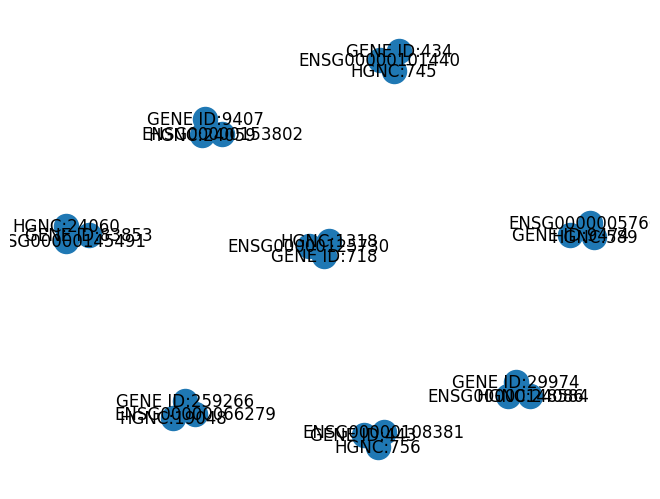

In [324]:
sub_concordance_G = nx.from_pandas_edgelist(sub_identifier_concordance_df, "primary_ID", "xref", create_using=nx.DiGraph)
nx.draw_spring(sub_concordance_G, with_labels=True)
plt.show()

In [325]:
list_of_scc_sub = list(nx.strongly_connected_components(sub_concordance_G))
len(list_of_scc_sub)

8

In [326]:
list_of_wcc_sub = list(nx.weakly_connected_components(sub_concordance_G))
len(list_of_wcc_sub)

8

In [327]:
list_of_isolates_sub = list(nx.isolates(sub_concordance_G))
len(list_of_isolates_sub)

0

In [328]:
sub_concordance_G.number_of_nodes()

24

In [329]:
def grouped_maximal_strong_clique_count(G_dir):
    # Step 1: Build mutual undirected graph
    G_mutual = nx.Graph()
    for u, v in G_dir.edges():
        if G_dir.has_edge(v, u):
            G_mutual.add_edge(u, v)

    # Step 2: Count maximal cliques only
    count_size_2 = 0
    count_size_3_or_more = 0

    for clique in nx.find_cliques(G_mutual):  # only returns maximal cliques
        if len(clique) == 2:
            count_size_2 += 1
        elif len(clique) >= 3:
            count_size_3_or_more += 1

    return count_size_2 + count_size_3_or_more


In [330]:
def get_maximal_strong_cliques(G_dir):
    """
    Return a list of maximal strong cliques in a directed graph.
    Each clique is represented as a list of nodes.
    """
    # Step 1: Build the mutual graph
    G_mutual = nx.Graph()
    for u, v in G_dir.edges():
        if G_dir.has_edge(v, u):
            G_mutual.add_edge(u, v)

    # Step 2: Extract maximal cliques
    cliques = list(nx.find_cliques(G_mutual))  # Only maximal cliques
    return cliques


In [331]:
sub_list_cliques = get_maximal_strong_cliques(sub_concordance_G)
len(sub_list_cliques)

8

number of nodes in the cliques

In [332]:
sub_nodes_in_clique = set().union(*sub_list_cliques)
len(sub_nodes_in_clique)

24

create a graph with all of the data

In [333]:
# Step 1: Remove rows with NaN or None in 'xref' for the graph creation
valid_df = identifier_concordance_df.dropna(subset=["xref"])

In [334]:
identifier_concordance_df

,primary_ID,gene_symbol,xref
0,ENSG00000210049,MT-TF,HGNC:7481
1,ENSG00000211459,MT-RNR1,HGNC:7470
2,ENSG00000210077,MT-TV,HGNC:7500
3,ENSG00000210082,MT-RNR2,HGNC:7471
4,ENSG00000209082,MT-TL1,HGNC:7490
...,...,...,...
180650,GENE ID:141732005,ADCY2-AS1,NaN
180651,GENE ID:141732006,NSG2-AS1,NaN
180652,GENE ID:141732007,ST18-AS1,NaN
180653,GENE ID:141732008,MICAL2-AS1,NaN


In [335]:
valid_df

,primary_ID,gene_symbol,xref
0,ENSG00000210049,MT-TF,HGNC:7481
1,ENSG00000211459,MT-RNR1,HGNC:7470
2,ENSG00000210077,MT-TV,HGNC:7500
3,ENSG00000210082,MT-RNR2,HGNC:7471
4,ENSG00000209082,MT-TL1,HGNC:7490
...,...,...,...
180399,GENE ID:133395144,CPSF6P1,ENSG00000271182
180401,GENE ID:133395146,RPL17P52,ENSG00000236132
180402,GENE ID:133395147,ETFRF1P1,ENSG00000228194
180403,GENE ID:133395148,SKP1P4,ENSG00000236079


In [336]:
valid_df.loc[valid_df["xref"].isna()]

,primary_ID,gene_symbol,xref


In [337]:
# Step 2: Create the graph from the valid rows
concordance_G = nx.from_pandas_edgelist(valid_df, "primary_ID", "xref", create_using=nx.DiGraph)


In [338]:
# Step 3: Find all unique nodes in 'primary_ID' and 'xref' columns (including isolated nodes)
all_nodes = set(identifier_concordance_df["primary_ID"])

# Step 5: Add the isolated nodes (those without edges) to the graph
concordance_G.add_nodes_from(all_nodes)


In [339]:
len(all_nodes)

137275

In [340]:
list_cliques = get_maximal_strong_cliques(concordance_G)
len(list_cliques)

60701

In [341]:
nodes_in_cliques = set().union(*list_cliques)
len(nodes_in_cliques)

127294

In [342]:
prefix_counts = defaultdict(int)

for item in nodes_in_cliques:
    for prefix in prefixes:
        if item.startswith(prefix):
            prefix_counts[prefix] += 1
            break  # stop at first matching prefix, if needed

# Print results
for prefix in prefixes:
    print(f"{prefix}: {prefix_counts[prefix]}")


HGNC: 43627
ENSG: 41478
GENE: 42189


In [343]:
if 'ENSG00000189064' in nodes_in_cliques:
    print("Found it!")
else:
    print("Nope, not there.")

Found it!


In [344]:
list_of_scc = list(nx.strongly_connected_components(concordance_G))
len(list_of_scc)

55568

In [345]:
list_of_isolates = list(nx.isolates(concordance_G))
len(list_of_isolates)

1687

In [346]:
prefix_groups = defaultdict(list)

for item in list_of_isolates:
    for prefix in prefixes:
        if item.startswith(prefix):
            prefix_groups[prefix].append(item)
            break

# Print results
for prefix in prefixes:
    print(f"{prefix}: {len(prefix_groups[prefix])}")


HGNC: 47
ENSG: 1306
GENE: 334


In [347]:
ensg_isolates_list = prefix_groups["ENSG"]
ensg_isolates_list

['ENSG00000252217',
 'ENSG00000201820',
 'ENSG00000200179',
 'ENSG00000222335',
 'ENSG00000276222',
 'ENSG00000200953',
 'ENSG00000207380',
 'ENSG00000201668',
 'ENSG00000253016',
 'ENSG00000206711',
 'ENSG00000264415',
 'ENSG00000264809',
 'ENSG00000266178',
 'ENSG00000276932',
 'ENSG00000238490',
 'ENSG00000202021',
 'ENSG00000199580',
 'ENSG00000252069',
 'ENSG00000199476',
 'ENSG00000283502',
 'ENSG00000200344',
 'ENSG00000199204',
 'ENSG00000200572',
 'ENSG00000265816',
 'ENSG00000212411',
 'ENSG00000276568',
 'ENSG00000283592',
 'ENSG00000276890',
 'ENSG00000266381',
 'ENSG00000207425',
 'ENSG00000280632',
 'ENSG00000200164',
 'ENSG00000222467',
 'ENSG00000275999',
 'ENSG00000281393',
 'ENSG00000275877',
 'ENSG00000222658',
 'ENSG00000206990',
 'ENSG00000199732',
 'ENSG00000200714',
 'ENSG00000207123',
 'ENSG00000199762',
 'ENSG00000263474',
 'ENSG00000199473',
 'ENSG00000201563',
 'ENSG00000201216',
 'ENSG00000200298',
 'ENSG00000283545',
 'ENSG00000202141',
 'ENSG00000278374',


In [348]:
len(set(ensg_isolates_list))

1306

In [349]:
mini_ensg_df = pd.read_csv(
    "../output/mini_ensg_df.csv", index_col=[0]
)
mini_ensg_df

,ENSG_ID,NCBI_ID,HGNC_ID,alias_symbol,gene_symbol
0,ENSG00000210049,NaN,HGNC:7481,MTTF,MT-TF
1,ENSG00000210049,NaN,HGNC:7481,TRNF,MT-TF
2,ENSG00000211459,NaN,HGNC:7470,12S,MT-RNR1
3,ENSG00000211459,NaN,HGNC:7470,MOTS-C,MT-RNR1
4,ENSG00000211459,NaN,HGNC:7470,MTRNR1,MT-RNR1
...,...,...,...,...,...
133058,ENSG00000197989,GENE ID:85028,HGNC:30062,LINC00100,SNHG12
133059,ENSG00000197989,GENE ID:85028,HGNC:30062,PNAS-123,SNHG12
133060,ENSG00000229388,NaN,HGNC:52502,LINC01715,TAF12-DT
133062,ENSG00000274978,GENE ID:26824,HGNC:10108,RNU11-1,RNU11


In [350]:
filtered_mini_ensg_df = mini_ensg_df[mini_ensg_df['ENSG_ID'].isin(ensg_isolates_list)]

# Step 2: Find which IDs in id_list did not match any record in df
matched_ids = set(filtered_mini_ensg_df['ENSG_ID'])
unmatched_ids = [id_ for id_ in ensg_isolates_list if id_ not in matched_ids]

# Results
print("Filtered DataFrame:")
print(filtered_mini_ensg_df)

print("\nUnmatched IDs:")
print(unmatched_ids)

Filtered DataFrame:
                ENSG_ID NCBI_ID HGNC_ID alias_symbol  gene_symbol
100     ENSG00000278457     NaN     NaN          NaN      5S_rRNA
569     ENSG00000277428     NaN     NaN          NaN        Y_RNA
588     ENSG00000277374     NaN     NaN          NaN           U1
592     ENSG00000274202     NaN     NaN          NaN           U2
600     ENSG00000275987     NaN     NaN          NaN           U1
...                 ...     ...     ...          ...          ...
132347  ENSG00000276839     NaN     NaN          NaN  Metazoa_SRP
132683  ENSG00000206692     NaN     NaN          NaN        Y_RNA
133019  ENSG00000283414     NaN     NaN          NaN           U6
133043  ENSG00000206905     NaN     NaN          NaN        Y_RNA
133044  ENSG00000283575     NaN     NaN          NaN           U6

[1306 rows x 5 columns]

Unmatched IDs:
[]


In [351]:
filtered_mini_ensg_df['gene_symbol'].value_counts()

gene_symbol
Y_RNA           845
Metazoa_SRP     216
U6               98
U1               26
5S_rRNA          17
7SK              13
SNORA70          12
U3               12
U2               11
U4                8
SNORA75           5
SNORA63           5
U8                4
Vault             4
5_8S_rRNA         4
SNORA74           3
SNORD63           2
SNORA62           2
snoZ196           2
SNORA73           2
U7                2
SNORD39           2
SNORD115          2
SNORD14           1
hsa-mir-1253      1
SNORD29           1
SNORD36           1
hsa-mir-423       1
SNORA72           1
SNORD33           1
SNORD116          1
SNORA71           1
Name: count, dtype: int64

In [352]:
list_of_wcc = list(nx.weakly_connected_components(concordance_G))
len(list_of_wcc)

45796

In [353]:
concordance_G.number_of_nodes()

139309

how many sccs that are not just a single node

In [354]:
scc_of_not_one = [s for s in list_of_scc if len(s) != 1]
len(scc_of_not_one)

43590

how many nodes are in a scc that are connected to other nodes

In [355]:
unique_values = set().union(*scc_of_not_one)
len(unique_values)

127331

how many sccs are just one node (either isolate or part of a wcc)

In [356]:
scc_of_one = [s for s in list_of_scc if len(s) == 1]
len(scc_of_one)

11978

how many wccs are just one node? (should be same as number of isolates)

In [357]:
wcc_of_one = [s for s in list_of_wcc if len(s) == 1]
len(wcc_of_one)

1687

this is the number of isolates

In [358]:
len(wcc_of_one) == len(list_of_isolates)

True

In [359]:
flat_scc_of_one = {item for subset in scc_of_one for item in subset}
flat_wcc_of_one = {item for subset in wcc_of_one for item in subset}

# Now, compute the symmetric difference
diff_bw_scc_of_one_and_wcc_of_one = list(flat_scc_of_one ^ flat_wcc_of_one)
len(diff_bw_scc_of_one_and_wcc_of_one)

10291

In [360]:
diff_bw_scc_of_one_and_wcc_of_one

['GENE ID:124906491',
 'HGNC:58243',
 'ENSG00000295836',
 'GENE ID:106481796',
 'GENE ID:124900425',
 'GENE ID:124900257',
 'GENE ID:124906721',
 'GENE ID:100874173',
 'GENE ID:105375192',
 'GENE ID:124906858',
 'ENSG00000291586',
 'ENSG00000292172',
 'GENE ID:107161144',
 'ENSG00000232280',
 'GENE ID:124905429',
 'HGNC:40580',
 'GENE ID:124904756',
 'GENE ID:124903889',
 'ENSG00000275274',
 'GENE ID:124908494',
 'ENSG00000280516',
 'ENSG00000273505',
 'HGNC:55330',
 'GENE ID:124907119',
 'ENSG00000280641',
 'GENE ID:106480749',
 'HGNC:58142',
 'ENSG00000255169',
 'GENE ID:2378',
 'ENSG00000274714',
 'ENSG00000263160',
 'ENSG00000282354',
 'GENE ID:117751731',
 'ENSG00000291590',
 'ENSG00000228691',
 'ENSG00000223376',
 'ENSG00000263012',
 'ENSG00000253961',
 'ENSG00000234057',
 'GENE ID:133039974',
 'GENE ID:124902338',
 'ENSG00000275577',
 'ENSG00000224705',
 'GENE ID:106480679',
 'ENSG00000288485',
 'GENE ID:139440223',
 'ENSG00000255649',
 'ENSG00000284110',
 'ENSG00000277365',
 'E

In [361]:
color_map = {
    "ENSG": "skyblue",
    "GENE ID": "lightgreen",
    "HGNC": "salmon",
    "OTHER": "gray"
}

In [362]:
from pyvis.network import Network
import networkx as nx
import pandas as pd

def get_prefix(node):
    if node.startswith("GENE ID"):
        return "GENE ID"
    elif node.startswith("ENSG"):
        return "ENSG"
    elif node.startswith("HGNC"):
        return "HGNC"
    else:
        return "OTHER"

def visualize_wcc_by_size(G, df, target_size):
    """
    Visualize the first Weakly Connected Component (WCC) of size `target_size` from graph `G`,
    using interactive Pyvis with color coding and gene symbol tooltips from `df`.

    Parameters:
    - G: A NetworkX DiGraph or Graph
    - df: DataFrame with 'primary_ID', 'xref', 'gene_symbol'
    - target_size: Integer size of the WCC to visualize
    """
    # Build a lookup from both primary_ID and xref to gene symbol
    id_to_symbol = (
        pd.concat([
            df[['primary_ID', 'gene_symbol']].copy().reset_index(drop=True),
            df[['xref', 'gene_symbol']].copy().rename(columns={'xref': 'primary_ID'}).reset_index(drop=True)
        ])
        .dropna(subset=['gene_symbol'])  # optional: drop rows with missing symbols
        .drop_duplicates(subset='primary_ID', keep='first')  # make index unique
        .set_index('primary_ID')['gene_symbol']
        .to_dict()
    )

    # Get all weakly connected components
    wccs = list(nx.weakly_connected_components(G))

    # Filter for WCCs that match the target size
    target_wccs = [wcc for wcc in wccs if len(wcc) == target_size]

    if not target_wccs:
        print(f"No WCCs of size {target_size} found.")
        return

    # Take the first matching WCC
    target_wcc_nodes = target_wccs[0]
    target_wcc_subgraph = G.subgraph(target_wcc_nodes).copy()

    # Create Pyvis Network with directed arrows
    net = Network(height='800px', width='100%', notebook=True, cdn_resources='in_line', directed=True)

    # Add nodes with color and gene symbol info
    for node in target_wcc_subgraph.nodes():
        prefix = get_prefix(node)
        color = color_map.get(prefix, "gray")

        gene_symbol = id_to_symbol.get(node, "N/A")

        # Label = ID (or gene symbol, or both)
        net.add_node(
            node,
            label=f"{gene_symbol} ({node})",  # Shows both on the node
            title=f"{gene_symbol}",           # Optional: tooltip can still just show symbol
            color=color
        )

        # --- Add legend nodes (fake nodes that represent each type) ---
    legend_items = {
        "ENSG": "skyblue",
        "GENE ID": "lightgreen",
        "HGNC": "salmon",
        "Other": "gray"
    }

    legend_y = -300  # Starting Y position for legend nodes
    legend_x = -800  # X offset to keep legend on side

    for i, (label, color) in enumerate(legend_items.items()):
        net.add_node(
            f"legend_{label}",
            label=label,
            shape="box",
            color=color,
            physics=False,  # Prevent them from moving
            x=legend_x,
            y=legend_y + i * 70,
            fixed=True
        )

    # Add edges
    for u, v in target_wcc_subgraph.edges():
        net.add_edge(u, v)

    # Show interactive graph in browser or notebook
    file_name = f"../output/interactive_wcc_size_{target_size}.html"
    net.show(file_name)
    print(f"Visualization saved to {file_name}")


In [363]:
visualize_wcc_by_size(concordance_G,identifier_concordance_df, 32)

../output/interactive_wcc_size_32.html
Visualization saved to ../output/interactive_wcc_size_32.html


In [364]:
def visualize_wcc_containing_node(G, df, target_node):
    """
    Visualize the WCC containing a specific node ID using Pyvis.
    
    Parameters:
    - G: NetworkX graph
    - df: DataFrame with 'primary_ID', 'xref', 'gene_symbol'
    - target_node: The node ID to search for (e.g., 'ENSG:...')
    """
    if target_node not in G:
        print(f"Node '{target_node}' not found in graph.")
        return

    # Find the WCC containing the target node
    for wcc in nx.weakly_connected_components(G):
        if target_node in wcc:
            target_wcc_nodes = wcc
            break
    else:
        print(f"No WCC found containing node '{target_node}'.")
        return

    # Build a lookup from both primary_ID and xref to gene symbol
    id_to_symbol = (
        pd.concat([
            df[['primary_ID', 'gene_symbol']].copy().reset_index(drop=True),
            df[['xref', 'gene_symbol']].copy().rename(columns={'xref': 'primary_ID'}).reset_index(drop=True)
        ])
        .dropna(subset=['gene_symbol'])
        .drop_duplicates(subset='primary_ID', keep='first')
        .set_index('primary_ID')['gene_symbol']
        .to_dict()
    )

    # Create subgraph
    subgraph = G.subgraph(target_wcc_nodes).copy()

    # Create Pyvis Network
    net = Network(height='800px', width='100%', notebook=True, cdn_resources='in_line', directed=True)

    for node in subgraph.nodes():
        prefix = get_prefix(node)
        color = color_map.get(prefix, "gray")

        gene_symbol = id_to_symbol.get(node, "N/A")

        net.add_node(
            node,
            label=f"{gene_symbol} ({node})",
            title=gene_symbol,
            color=color
        )
    # --- Add legend nodes (fake nodes that represent each type) ---
    legend_items = {
        "ENSG": "skyblue",
        "GENE ID": "lightgreen",
        "HGNC": "salmon",
        "Other": "gray"
    }

    legend_y = -300  # Starting Y position for legend nodes
    legend_x = -800  # X offset to keep legend on side

    for i, (label, color) in enumerate(legend_items.items()):
        net.add_node(
            f"legend_{label}",
            label=label,
            shape="box",
            color=color,
            physics=False,  # Prevent them from moving
            x=legend_x,
            y=legend_y + i * 70,
            fixed=True
        )

    for u, v in subgraph.edges():
        net.add_edge(u, v)

    file_name = f"../output/wcc_containing_{target_node.replace(':', '_')}.html"
    net.show(file_name)
    print(f"Visualization saved to {file_name}")


In [365]:
visualize_wcc_containing_node(concordance_G,identifier_concordance_df, "ENSG00000172456")

../output/wcc_containing_ENSG00000172456.html
Visualization saved to ../output/wcc_containing_ENSG00000172456.html


In [366]:
def visualize_wcc_by_gene_symbol(G, df, target_symbol):
    """
    Find and visualize the WCC containing a node that maps to the given gene symbol.

    Parameters:
    - G: NetworkX graph
    - df: DataFrame with 'primary_ID', 'xref', 'gene_symbol'
    - target_symbol: gene symbol string to search for (e.g., 'BRCA2')
    """
    # Step 1: Find all IDs associated with this gene symbol
    matched_ids = set(
        df[df['gene_symbol'] == target_symbol]['primary_ID'].tolist()
        + df[df['gene_symbol'] == target_symbol]['xref'].tolist()
    )

    matched_ids = {i for i in matched_ids if i in G}  # Only keep IDs that exist in the graph

    if not matched_ids:
        print(f"No IDs found in graph for gene symbol '{target_symbol}'")
        return

    # Step 2: Find the WCC that contains one of those IDs
    for wcc in nx.weakly_connected_components(G):
        if matched_ids.intersection(wcc):
            target_wcc_nodes = wcc
            break
    else:
        print(f"No WCC found containing IDs for symbol '{target_symbol}'")
        return

    # Step 3: Build ID → gene symbol map
    id_to_symbol = (
        pd.concat([
            df[['primary_ID', 'gene_symbol']].copy(),
            df[['xref', 'gene_symbol']].copy().rename(columns={'xref': 'primary_ID'})
        ])
        .dropna(subset=['gene_symbol'])
        .drop_duplicates(subset='primary_ID', keep='first')
        .set_index('primary_ID')['gene_symbol']
        .to_dict()
    )

    # Step 4: Visualize with Pyvis
    from pyvis.network import Network

    net = Network(height='800px', width='100%', notebook=True, cdn_resources='in_line', directed=True)

    def get_prefix(node):
        return node.split(':')[0] if ':' in node else node.split()[0]

    for node in target_wcc_nodes:
        prefix = get_prefix(node)
        color = {
            'ENSG': 'skyblue',
            'GENE': 'lightgreen',
            'HGNC': 'salmon'
        }.get(prefix, 'gray')

        label = id_to_symbol.get(node, 'N/A')
        highlight = "gold" if node in matched_ids else color

        net.add_node(
            node,
            label=f"{label} ({node})",
            title=label,
            color=highlight
        )
        # --- Add legend nodes (fake nodes that represent each type) ---
    legend_items = {
        "ENSG": "skyblue",
        "GENE ID": "lightgreen",
        "HGNC": "salmon",
        "Other": "gray",
        "Matched Node": "gold"
    }

    legend_y = -300  # Starting Y position for legend nodes
    legend_x = -800  # X offset to keep legend on side

    for i, (label, color) in enumerate(legend_items.items()):
        net.add_node(
            f"legend_{label}",
            label=label,
            shape="box",
            color=color,
            physics=False,  # Prevent them from moving
            x=legend_x,
            y=legend_y + i * 70,
            fixed=True
        )


    for u, v in G.subgraph(target_wcc_nodes).edges():
        net.add_edge(u, v)

    file_name = f"../output/wcc_for_{target_symbol}.html"
    net.show(file_name)
    print(f"Visualization saved to {file_name}")


In [367]:
visualize_wcc_by_gene_symbol(concordance_G,identifier_concordance_df, "")

No IDs found in graph for gene symbol ''


In [368]:
visualize_wcc_by_gene_symbol(concordance_G,identifier_concordance_df, "C3")

../output/wcc_for_C3.html
Visualization saved to ../output/wcc_for_C3.html


In [369]:
largest_wcc_nodes = max(nx.weakly_connected_components(concordance_G), key=len)
largest_wcc_nodes

{'ENSG00000273730',
 'ENSG00000274917',
 'ENSG00000275215',
 'ENSG00000275757',
 'ENSG00000276700',
 'ENSG00000277739',
 'ENSG00000278189',
 'ENSG00000278233',
 'ENSG00000288326',
 'ENSG00000288387',
 'GENE ID:100008587',
 'GENE ID:106632260',
 'GENE ID:109864274',
 'GENE ID:109864281',
 'GENE ID:109910381',
 'GENE ID:109910384',
 'GENE ID:124907114',
 'GENE ID:124907115',
 'GENE ID:124907116',
 'GENE ID:124907117',
 'GENE ID:124907118',
 'GENE ID:124907119',
 'GENE ID:124907120',
 'GENE ID:124907121',
 'GENE ID:124907122',
 'GENE ID:124907123',
 'GENE ID:124907124',
 'GENE ID:124907125',
 'GENE ID:124907126',
 'GENE ID:124907127',
 'GENE ID:124907128',
 'GENE ID:124907129',
 'GENE ID:124907130',
 'GENE ID:124907131',
 'GENE ID:124907132',
 'GENE ID:124907133',
 'GENE ID:124907134',
 'GENE ID:124907135',
 'GENE ID:124907136',
 'GENE ID:124907137',
 'GENE ID:124907138',
 'GENE ID:124907139',
 'GENE ID:124907140',
 'GENE ID:124907141',
 'GENE ID:124907142',
 'GENE ID:124907143',
 'GENE I

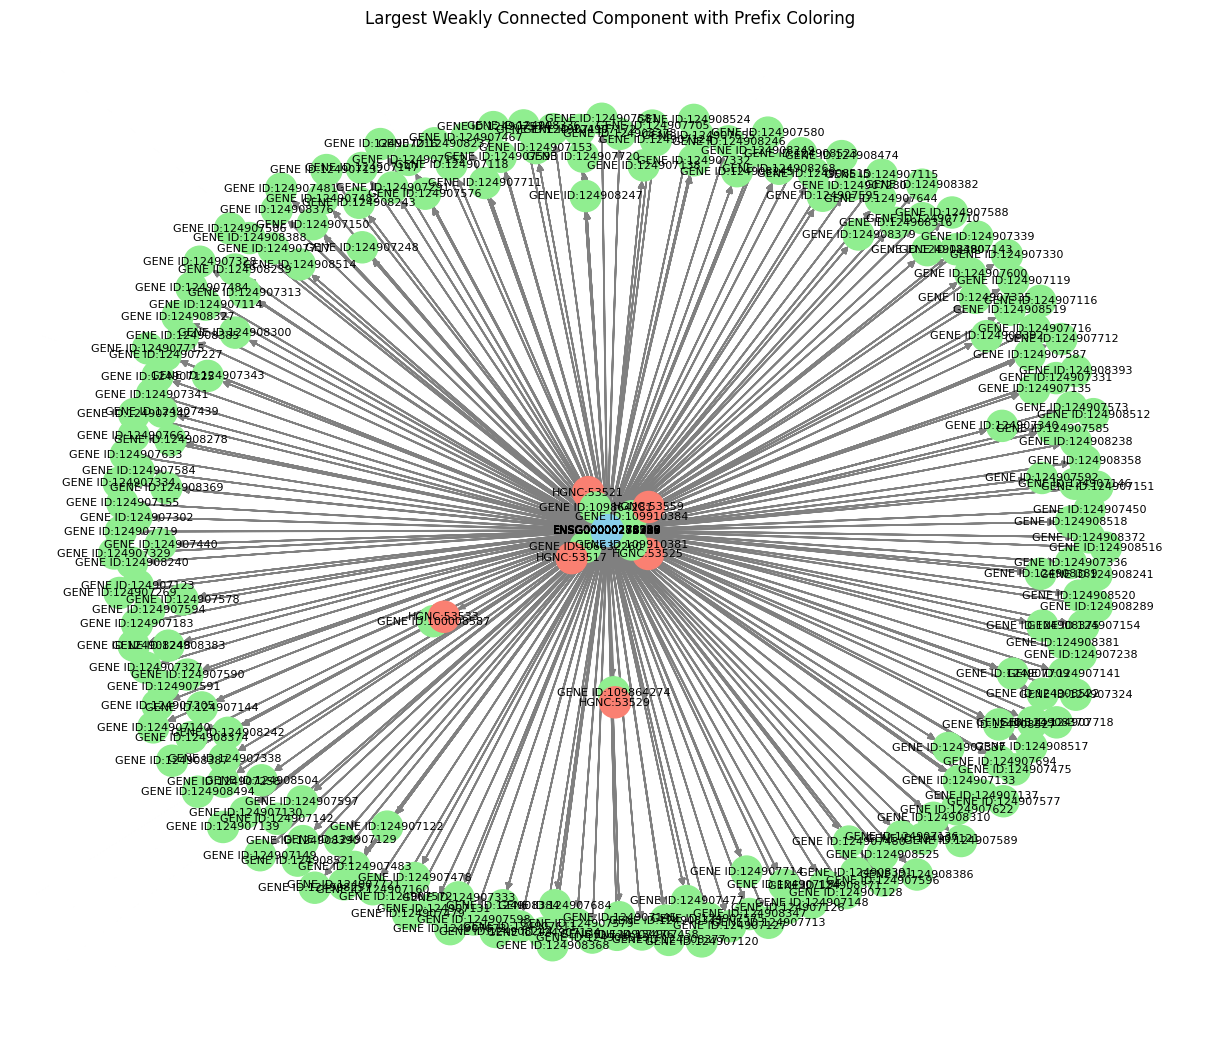

In [370]:
def visualize_largest_wcc(G):
    """
    Visualize the largest Weakly Connected Component (WCC) of the graph `G`.
    Nodes are colored based on their prefix (e.g., 'ENSG', 'GENE ID', 'HGNC').
    """
    # Step 1: Get the largest WCC
    largest_wcc_nodes = max(nx.weakly_connected_components(G), key=len)

    # Step 2: Create a subgraph from the largest WCC
    largest_wcc_subgraph = G.subgraph(largest_wcc_nodes).copy()

    # Step 3: Assign colors based on the node prefixes
    color_map = []
    for node in largest_wcc_subgraph.nodes():
        prefix = get_prefix(node)
        if prefix == 'ENSG':
            color_map.append('skyblue')
        elif prefix == 'GENE ID':
            color_map.append('lightgreen')
            
        elif prefix == 'HGNC':
            color_map.append('salmon')
        else:
            color_map.append('gray')

    # Step 4: Visualize the subgraph
    plt.figure(figsize=(12, 10))  # adjust size as needed
    pos = nx.spring_layout(largest_wcc_subgraph, seed=42)  # layout for the nodes

    # Draw the graph
    nx.draw(
        largest_wcc_subgraph,
        pos,
        with_labels=True,
        node_color=color_map,
        edge_color='gray',
        node_size=500,
        font_size=8
    )
    plt.title("Largest Weakly Connected Component with Prefix Coloring")
    plt.show()

# Call the function with your graph `G`
visualize_largest_wcc(concordance_G)


In [371]:
def visualize_largest_wcc_interactive(G):
    """
    Visualize the largest Weakly Connected Component (WCC) of the graph `G` interactively using Pyvis.
    Nodes are colored based on their prefix (e.g., 'ENSG', 'GENE ID', 'HGNC').
    """
    # Step 1: Get the largest WCC
    largest_wcc_nodes = max(nx.weakly_connected_components(G), key=len)

    # Step 2: Create a subgraph from the largest WCC
    largest_wcc_subgraph = G.subgraph(largest_wcc_nodes).copy()

    # Step 3: Create a Pyvis network object with 'in_line' CDN resources
    net = Network(height='800px', width='100%', notebook=True, cdn_resources='in_line', directed=True)

    # Step 4: Add nodes and edges to Pyvis network
    for node in largest_wcc_subgraph.nodes():
        prefix = get_prefix(node)
        # Color nodes based on prefix
        if prefix == 'ENSG':
            color = 'skyblue'
        elif prefix == 'GENE ID':
            color = 'lightgreen'
        elif prefix == 'HGNC':
            color = 'salmon'
        else:
            color = 'gray'

        # Add nodes with color
        net.add_node(node, label=node, color=color)

    for u, v in largest_wcc_subgraph.edges():
        # Add edges to the network
        net.add_edge(u, v)

    # Step 5: Show the network interactively
    net.show("../output/interactive_wcc_graph.html")

# Call the function with your graph `G`
visualize_largest_wcc_interactive(concordance_G)


../output/interactive_wcc_graph.html


Illustration of how you can hve more SCCs than WCCs

In [372]:
Gsimple = nx.DiGraph()

In [373]:
Gsimple.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6,4), (6,1)])

In [374]:
Gsimplelist_of_scc = list(nx.strongly_connected_components(Gsimple))
len(Gsimplelist_of_scc)

2

In [375]:
Gsimplelist_of_wcc = list(nx.weakly_connected_components(Gsimple))
len(Gsimplelist_of_wcc)

1